# K-Means Clustering für Diamanten

K-Means ist ein iterativer Clustering-Algorithmus, der Daten in eine vordefinierte Anzahl von **k** Clustern unterteilt, indem er die Punkte basierend auf der Nähe zu den Clusterzentroiden gruppiert. Ziel ist es, die Summe der quadratischen Abstände zwischen den Punkten und ihren Zentroiden zu minimieren.


In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
# Daten laden und vorbereiten
# Daten laden
silent = True
%run ../dataLoadAndPrepare.ipynb

print("Features")
display(df.head())  

features = ['carat', 'price']  
df_cluster = df[features]

print("Für das Clustering werden alle numerischen Features verwendet")

# Features für das Clustering
display(df_cluster.head())


Features


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Für das Clustering werden alle numerischen Features verwendet


,carat,price
0,0.23,326
1,0.21,326
2,0.23,327
3,0.29,334
4,0.31,335


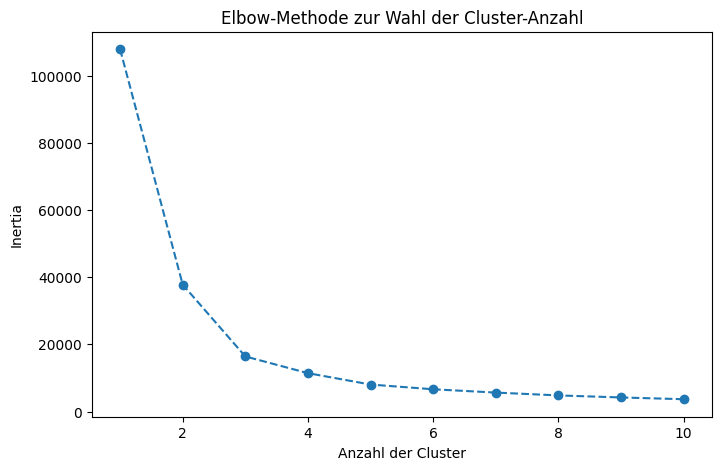

In [3]:
#Bestimmung der Anzahl der Cluster
# Elbow-Methode

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster)

inertia = []
cluster_range = range(1, 11)  # Testen von 1 bis 10 Clustern

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)
    
# Plot der Inertia-Werte
plt.figure(figsize=(8,5))
plt.plot(cluster_range, inertia, marker='o', linestyle='--')
plt.xlabel('Anzahl der Cluster')
plt.ylabel('Inertia')
plt.title('Elbow-Methode zur Wahl der Cluster-Anzahl')
plt.show()

# Vor k = 2 nimmt die Inertia sehr stark ab.
# Nach k = 3 wird die Reduktion kleiner, d. h., zusätzliche Cluster verbessern die Clustering-Qualität nicht mehr so stark.

C:\Users\micha\AppData\Local\Temp\ipykernel_7824\1923349344.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster['Cluster'] = kmeans.fit_predict(df_scaled)


Cluster-Zentren:
 [[ 0.58984947  0.39303866]
 [-0.69838874 -0.64250094]
 [ 2.01585205  2.27571165]]
Cluster
1    31276
0    16722
2     5942
Name: count, dtype: int64
2D-Visualisierung der Cluster:
PCA 1 (erste Hauptkomponente) → Die Richtung mit der größten Varianz in den Daten
PCA 2 (zweite Hauptkomponente) → Die Richtung mit der zweitgrößten Varianz


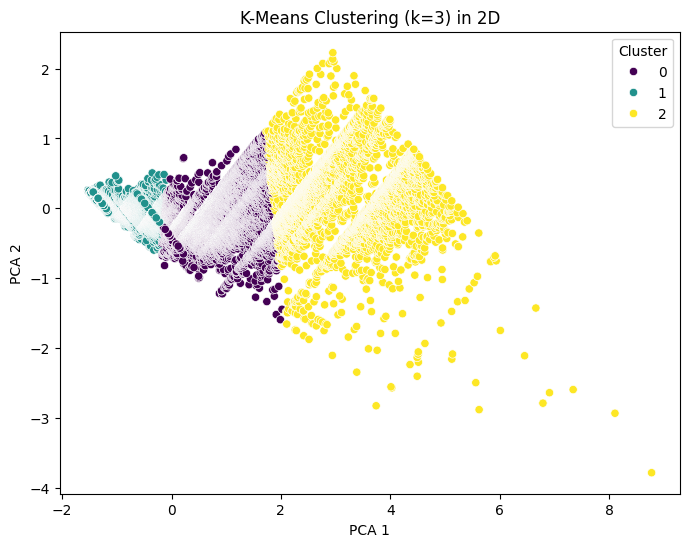

Diamanten basierend auf ihren Karat- und Preis-Werten gruppiert


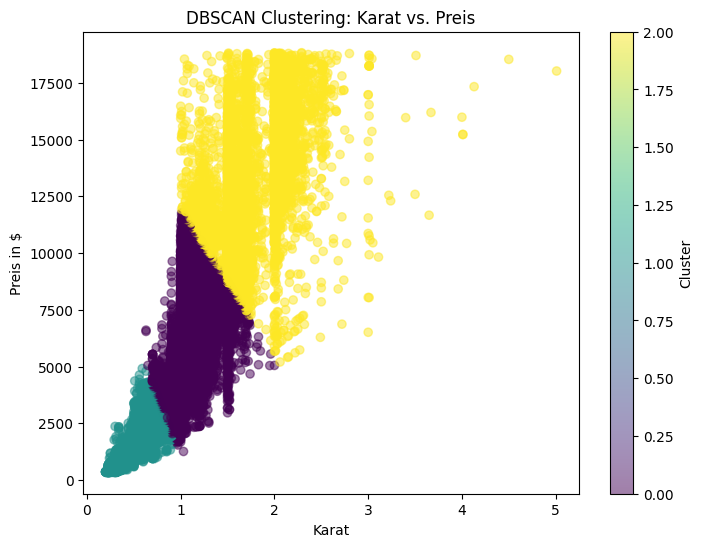

In [ ]:
#Visualisierung der Cluster
# K-Means Clustering mit k = 3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_cluster['Cluster'] = kmeans.fit_predict(df_scaled)

# Cluster-Zentren anzeigen
print("Cluster-Zentren:\n", kmeans.cluster_centers_)

# Cluster-Anzahl überprüfen
print(df_cluster['Cluster'].value_counts())


# PCA für 2D-Visualisierung
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Scatterplot der Cluster
print("2D-Visualisierung der Cluster:")
print("PCA 1 (erste Hauptkomponente) → Die Richtung mit der größten Varianz in den Daten")
print("PCA 2 (zweite Hauptkomponente) → Die Richtung mit der zweitgrößten Varianz")
plt.figure(figsize=(8,6))
sns.scatterplot(x=df_pca[:,0], y=df_pca[:,1], hue=df_cluster['Cluster'], palette='viridis')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('K-Means Clustering (k=3) in 2D')
plt.legend(title="Cluster")
plt.show()


sns.pairplot(df_cluster, hue='Cluster', palette='viridis')
plt.suptitle("Paarweise Merkmalsvergleiche mit Cluster-Farben", y=1.02)
plt.show()

print("Diamanten basierend auf ihren Karat- und Preis-Werten gruppiert")
plt.figure(figsize=(8,6))
plt.scatter(df_cluster['carat'], df_cluster['price'], c=df_cluster['Cluster'], cmap='viridis', alpha=0.5)
plt.xlabel("Karat")
plt.ylabel("Preis in $")
plt.title("DBSCAN Clustering: Karat vs. Preis")
plt.colorbar(label="Cluster")
plt.show()